In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
post_code_df = pd.read_csv('../data/raw/zipcodes_num_nl_new.csv')
post_code_df.head()

,Postcode,Plaatsnaam,Deelgemeente,Hoofdgemeente,Provincie
0,612,Sinterklaas,NaN,Sinterklaas,NaN
1,1000,Brussel,Neen,BRUSSEL,BRUSSEL
2,1005,Verenigde Vergadering van de Gemeenschappelijke,NaN,Verenigde Vergadering van de Gemeenschappelijke,BRUSSEL
3,1006,Raad van de Vlaamse Gemeenschapscommissie,NaN,Raad van de Vlaamse Gemeenschapscommissie,BRUSSEL
4,1007,Assemblée de la Commission Communautaire Franç...,NaN,Assemblée de la Commission Communautaire Franç...,BRUSSEL


In [3]:
def parse_year(year):
    return pd.to_datetime(str(year), format='%Y')

In [4]:
immo_raw_df = pd.read_csv('../data/raw/rawdata.csv', parse_dates=['Build Year'], date_format=parse_year)
immo_raw_df.head()

,ID,Locality,Postal Code,Build Year,Facades,Habitable Surface,Land Surface,Type,Subtype,Price,...,Has starting Price,Transaction Subtype,Heating Type,Is Holiday Property,Gas Water Electricity,Sewer,Sea view,Parking count inside,Parking count outside,Parking box count
0,11149965,Waremme,4300,1974,3.0,115.0,NaN,APARTMENT,APARTMENT,220000,...,False,BUY_REGULAR,FUELOIL,NaN,NaN,NaN,NaN,1.0,1.0,NaN
1,11149932,Wetteren,9230,2015,3.0,134.0,NaN,APARTMENT,DUPLEX,339000,...,False,BUY_REGULAR,GAS,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,11150061,Ixelles,1050,1958,2.0,134.0,NaN,APARTMENT,APARTMENT,495000,...,False,BUY_REGULAR,GAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11153822,BERCHEM,2600,1968,2.0,90.0,NaN,APARTMENT,APARTMENT,175000,...,NaN,BUY_REGULAR,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,11153121,Jette,1090,1965,2.0,80.0,NaN,APARTMENT,APARTMENT,289000,...,False,BUY_REGULAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
immo_raw_df = pd.merge(immo_raw_df, post_code_df, left_on='Postal Code', right_on='Postcode', how='inner')
del immo_raw_df['Postcode']
del immo_raw_df['Plaatsnaam']
del immo_raw_df['Deelgemeente']

immo_raw_df.rename(columns={'Hoofdgemeente':'Municipality', 'Provincie': 'Province'}, inplace=True)

immo_raw_df

,ID,Locality,Postal Code,Build Year,Facades,Habitable Surface,Land Surface,Type,Subtype,Price,...,Heating Type,Is Holiday Property,Gas Water Electricity,Sewer,Sea view,Parking count inside,Parking count outside,Parking box count,Municipality,Province
0,11149965,Waremme,4300,1974,3.0,115.0,NaN,APARTMENT,APARTMENT,220000,...,FUELOIL,NaN,NaN,NaN,NaN,1.0,1.0,NaN,WAREMME,LUIK
1,11149965,Waremme,4300,1974,3.0,115.0,NaN,APARTMENT,APARTMENT,220000,...,FUELOIL,NaN,NaN,NaN,NaN,1.0,1.0,NaN,WAREMME,LUIK
2,11149965,Waremme,4300,1974,3.0,115.0,NaN,APARTMENT,APARTMENT,220000,...,FUELOIL,NaN,NaN,NaN,NaN,1.0,1.0,NaN,WAREMME,LUIK
3,11149965,Waremme,4300,1974,3.0,115.0,NaN,APARTMENT,APARTMENT,220000,...,FUELOIL,NaN,NaN,NaN,NaN,1.0,1.0,NaN,WAREMME,LUIK
4,11149965,Waremme,4300,1974,3.0,115.0,NaN,APARTMENT,APARTMENT,220000,...,FUELOIL,NaN,NaN,NaN,NaN,1.0,1.0,NaN,WAREMME,LUIK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28712,11162921,Gistel,8470,1958,2.0,270.0,923.0,HOUSE,HOUSE,325000,...,GAS,NaN,True,CONNECTED,NaN,1.0,NaN,NaN,GISTEL,WEST-VLAANDEREN
28713,11162917,EDEGEM,2650,1951,2.0,69.0,NaN,APARTMENT,APARTMENT,175000,...,GAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EDEGEM,ANTWERPEN
28714,11162916,Erps-Kwerps,3071,1991,4.0,390.0,1778.0,HOUSE,VILLA,899000,...,FUELOIL,NaN,True,CONNECTED,NaN,2.0,3.0,NaN,KORTENBERG,VLAAMS-BRABANT
28715,11101285,Vilvoorde,1800,2002,3.0,90.0,NaN,APARTMENT,APARTMENT,259000,...,GAS,NaN,NaN,NaN,NaN,1.0,NaN,NaN,VILVOORDE,VLAAMS-BRABANT


In [6]:
immo_raw_df.describe()

,ID,Postal Code,Facades,Habitable Surface,Land Surface,Price,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Surface,Fireplace Count,Terrace Surface,Garden Surface,Living Surface,Consumption Per m2,Cadastral Income,Parking count inside,Parking count outside,Parking box count
count,2.871700e+04,28717.000000,21079.000000,27451.000000,12757.000000,2.871700e+04,28394.000000,25206.000000,22889.000000,28272.000000,10981.000000,6678.000000,17183.000000,5605.000000,14684.000000,17634.000000,28717.000000,10792.000000,10882.000000,0.0
mean,1.100831e+07,5645.973430,2.795246,145.794616,908.922239,3.814762e+05,2.609671,1.267873,1.570405,5.022708,12.963482,-0.804283,20.919339,678.466726,34.188641,249.065660,328.015322,9.936898,6.583624,NaN
std,3.510620e+05,3206.067926,0.842584,187.923651,2741.122206,2.590746e+05,1.288855,0.720415,0.881298,2.546233,28.773040,0.595424,32.417940,3042.831117,36.081045,629.167639,665.320069,416.819667,19.358764,NaN
min,7.309243e+06,1000.000000,1.000000,12.000000,0.000000,3.000000e+04,0.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-18.000000,0.000000,1.000000,1.000000,NaN
25%,1.103457e+07,2520.000000,2.000000,90.000000,196.000000,2.599000e+05,2.000000,1.000000,1.000000,4.000000,8.000000,-1.000000,9.000000,65.000000,27.000000,82.000000,0.000000,1.000000,1.000000,NaN
50%,1.114329e+07,5300.000000,3.000000,119.000000,387.000000,3.288400e+05,3.000000,1.000000,1.000000,4.000000,11.000000,-1.000000,14.000000,156.000000,32.000000,197.000000,0.000000,1.000000,1.000000,NaN
75%,1.115810e+07,9050.000000,4.000000,170.000000,877.000000,4.240000e+05,3.000000,1.000000,2.000000,6.000000,15.000000,-1.000000,24.000000,500.000000,40.000000,337.000000,522.000000,2.000000,3.000000,NaN
max,1.116304e+07,9990.000000,7.000000,7819.000000,58835.000000,7.650000e+06,25.000000,20.000000,21.000000,61.000000,1317.000000,2.000000,973.000000,80000.000000,4146.000000,43792.000000,9641.000000,25000.000000,155.000000,NaN


In [7]:
immo_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28717 entries, 0 to 28716
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     28717 non-null  int64  
 1   Locality               28717 non-null  object 
 2   Postal Code            28717 non-null  int64  
 3   Build Year             20985 non-null  object 
 4   Facades                21079 non-null  float64
 5   Habitable Surface      27451 non-null  float64
 6   Land Surface           12757 non-null  float64
 7   Type                   28717 non-null  object 
 8   Subtype                28717 non-null  object 
 9   Price                  28717 non-null  int64  
 10  Sale Type              28717 non-null  object 
 11  Bedroom Count          28394 non-null  float64
 12  Bathroom Count         25206 non-null  float64
 13  Toilet Count           22889 non-null  float64
 14  Room Count             28272 non-null  float64
 15  Ki

In [8]:
# Number of observations and columns

immo_raw_df.shape

(28717, 45)

In [9]:
# checking for duplicate rows

immo_raw_df.duplicated().sum()

19957

In [10]:
# Deleting duplicate rows
 
immo_raw_df = immo_raw_df.drop_duplicates()
immo_raw_df.shape

(8760, 45)

# We have 8760 observations, one target (Price) and 42 features

In [11]:
# Changing the bool type to int {True: 1, False: 0}

# Select bool columns
boolean_columns = immo_raw_df.select_dtypes(include=bool).columns

# Apply the lambda function to each element of the Boolean columns.
immo_raw_df[boolean_columns] = immo_raw_df[boolean_columns].apply(lambda x: x.map({True: 1, False: 0}))


# Change the data type of columns to int
immo_raw_df[boolean_columns] = immo_raw_df[boolean_columns].astype(int)

immo_raw_df

/tmp/ipykernel_125218/1115664358.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  immo_raw_df[boolean_columns] = immo_raw_df[boolean_columns].apply(lambda x: x.map({True: 1, False: 0}))
/tmp/ipykernel_125218/1115664358.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  immo_raw_df[boolean_columns] = immo_raw_df[boolean_columns].astype(int)


,ID,Locality,Postal Code,Build Year,Facades,Habitable Surface,Land Surface,Type,Subtype,Price,...,Heating Type,Is Holiday Property,Gas Water Electricity,Sewer,Sea view,Parking count inside,Parking count outside,Parking box count,Municipality,Province
0,11149965,Waremme,4300,1974,3.0,115.0,NaN,APARTMENT,APARTMENT,220000,...,FUELOIL,NaN,NaN,NaN,NaN,1.0,1.0,NaN,WAREMME,LUIK
7,11149932,Wetteren,9230,2015,3.0,134.0,NaN,APARTMENT,DUPLEX,339000,...,GAS,NaN,NaN,NaN,NaN,NaN,1.0,NaN,WETTEREN,OOST-VLAANDEREN
10,11150061,Ixelles,1050,1958,2.0,134.0,NaN,APARTMENT,APARTMENT,495000,...,GAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELSENE,BRUSSEL
11,11153822,BERCHEM,2600,1968,2.0,90.0,NaN,APARTMENT,APARTMENT,175000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,ANTWERPEN,ANTWERPEN
12,11153121,Jette,1090,1965,2.0,80.0,NaN,APARTMENT,APARTMENT,289000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JETTE,BRUSSEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28353,11163004,Lier,2500,1899,2.0,109.0,83.0,HOUSE,HOUSE,239000,...,GAS,NaN,True,NaN,NaN,NaN,NaN,NaN,LIER,ANTWERPEN
28355,11163001,Oudenaarde,9700,NaN,NaN,115.0,120.0,HOUSE,HOUSE,225000,...,GAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OUDENAARDE,OOST-VLAANDEREN
28627,11163000,Asse,1730,1952,3.0,188.0,0.0,HOUSE,HOUSE,280000,...,GAS,NaN,True,NaN,NaN,NaN,NaN,NaN,ASSE,VLAAMS-BRABANT
28631,11162997,Hasselt,3500,1969,NaN,84.0,NaN,APARTMENT,APARTMENT,219000,...,GAS,NaN,NaN,NaN,NaN,1.0,NaN,NaN,HASSELT,LIMBURG


In [12]:
# Displaying list of Property Types  

immo_raw_df.Type.unique()

array(['APARTMENT', 'HOUSE', 'OFFICE', 'COMMERCIAL', 'LAND', 'GARAGE'],
      dtype=object)

In [13]:
# Getting just APARTMENT AND HOUSE

immo_AP_H =immo_raw_df[immo_raw_df['Type'].isin(['APARTMENT', 'HOUSE'])]
immo_AP_H

,ID,Locality,Postal Code,Build Year,Facades,Habitable Surface,Land Surface,Type,Subtype,Price,...,Heating Type,Is Holiday Property,Gas Water Electricity,Sewer,Sea view,Parking count inside,Parking count outside,Parking box count,Municipality,Province
0,11149965,Waremme,4300,1974,3.0,115.0,NaN,APARTMENT,APARTMENT,220000,...,FUELOIL,NaN,NaN,NaN,NaN,1.0,1.0,NaN,WAREMME,LUIK
7,11149932,Wetteren,9230,2015,3.0,134.0,NaN,APARTMENT,DUPLEX,339000,...,GAS,NaN,NaN,NaN,NaN,NaN,1.0,NaN,WETTEREN,OOST-VLAANDEREN
10,11150061,Ixelles,1050,1958,2.0,134.0,NaN,APARTMENT,APARTMENT,495000,...,GAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELSENE,BRUSSEL
11,11153822,BERCHEM,2600,1968,2.0,90.0,NaN,APARTMENT,APARTMENT,175000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,ANTWERPEN,ANTWERPEN
12,11153121,Jette,1090,1965,2.0,80.0,NaN,APARTMENT,APARTMENT,289000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JETTE,BRUSSEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28353,11163004,Lier,2500,1899,2.0,109.0,83.0,HOUSE,HOUSE,239000,...,GAS,NaN,True,NaN,NaN,NaN,NaN,NaN,LIER,ANTWERPEN
28355,11163001,Oudenaarde,9700,NaN,NaN,115.0,120.0,HOUSE,HOUSE,225000,...,GAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OUDENAARDE,OOST-VLAANDEREN
28627,11163000,Asse,1730,1952,3.0,188.0,0.0,HOUSE,HOUSE,280000,...,GAS,NaN,True,NaN,NaN,NaN,NaN,NaN,ASSE,VLAAMS-BRABANT
28631,11162997,Hasselt,3500,1969,NaN,84.0,NaN,APARTMENT,APARTMENT,219000,...,GAS,NaN,NaN,NaN,NaN,1.0,NaN,NaN,HASSELT,LIMBURG


In [14]:
# Displaying column names

immo_AP_H.columns

Index(['ID', 'Locality', 'Postal Code', 'Build Year', 'Facades',
       'Habitable Surface', 'Land Surface', 'Type', 'Subtype', 'Price',
       'Sale Type', 'Bedroom Count', 'Bathroom Count', 'Toilet Count',
       'Room Count', 'Kitchen', 'Kitchen Surface', 'Kitchen Type', 'Furnished',
       'Openfire', 'Fireplace Count', 'Terrace', 'Terrace Surface',
       'Terrace Orientation', 'Garden Exists', 'Garden Surface',
       'Garden Orientation', 'Swimming Pool', 'State of Building',
       'Living Surface', 'EPC', 'Consumption Per m2', 'Cadastral Income',
       'Has starting Price', 'Transaction Subtype', 'Heating Type',
       'Is Holiday Property', 'Gas Water Electricity', 'Sewer', 'Sea view',
       'Parking count inside', 'Parking count outside', 'Parking box count',
       'Municipality', 'Province'],
      dtype='object')

In [15]:
interest_columns = ['Price', 'Build Year', 'Facades', 'Habitable Surface', 'Land Surface', 'Type', 'Bedroom Count', 'Bathroom Count', 'Toilet Count', 'Room Count', 'Kitchen Surface', 'Kitchen Type', 'Furnished', 'Fireplace Count', 'Terrace', 'Terrace Surface', 'Garden Surface', 'Swimming Pool', 'State of Building', 'Living Surface','EPC', 'Consumption Per m2', 'Sea view', 'Parking count inside', 'Parking count outside', 'Municipality', 'Province']

immo_AP_H = immo_AP_H[interest_columns]
immo_AP_H

,Price,Build Year,Facades,Habitable Surface,Land Surface,Type,Bedroom Count,Bathroom Count,Toilet Count,Room Count,...,Swimming Pool,State of Building,Living Surface,EPC,Consumption Per m2,Sea view,Parking count inside,Parking count outside,Municipality,Province
0,220000,1974,3.0,115.0,NaN,APARTMENT,3.0,1.0,2.0,6.0,...,False,GOOD,34.0,C,187.0,NaN,1.0,1.0,WAREMME,LUIK
7,339000,2015,3.0,134.0,NaN,APARTMENT,3.0,1.0,2.0,6.0,...,False,GOOD,30.0,B,113.0,NaN,NaN,1.0,WETTEREN,OOST-VLAANDEREN
10,495000,1958,2.0,134.0,NaN,APARTMENT,2.0,1.0,2.0,5.0,...,False,GOOD,40.0,D,202.0,NaN,NaN,NaN,ELSENE,BRUSSEL
11,175000,1968,2.0,90.0,NaN,APARTMENT,2.0,1.0,1.0,4.0,...,NaN,GOOD,37.0,B,124.0,NaN,NaN,1.0,ANTWERPEN,ANTWERPEN
12,289000,1965,2.0,80.0,NaN,APARTMENT,3.0,1.0,1.0,5.0,...,False,GOOD,30.0,G,383.0,NaN,NaN,NaN,JETTE,BRUSSEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28353,239000,1899,2.0,109.0,83.0,HOUSE,2.0,2.0,1.0,5.0,...,NaN,GOOD,NaN,D,318.0,NaN,NaN,NaN,LIER,ANTWERPEN
28355,225000,NaN,NaN,115.0,120.0,HOUSE,4.0,1.0,1.0,6.0,...,NaN,GOOD,28.0,NaN,NaN,NaN,NaN,NaN,OUDENAARDE,OOST-VLAANDEREN
28627,280000,1952,3.0,188.0,0.0,HOUSE,2.0,2.0,2.0,6.0,...,NaN,TO_BE_DONE_UP,32.0,F,568.0,NaN,NaN,NaN,ASSE,VLAAMS-BRABANT
28631,219000,1969,NaN,84.0,NaN,APARTMENT,2.0,1.0,1.0,4.0,...,NaN,NaN,NaN,C,259.0,NaN,1.0,NaN,HASSELT,LIMBURG


In [16]:
# Numerical features

immo_AP_H.select_dtypes(include=['int', 'float']).columns

Index(['Price', 'Facades', 'Habitable Surface', 'Land Surface',
       'Bedroom Count', 'Bathroom Count', 'Toilet Count', 'Room Count',
       'Kitchen Surface', 'Furnished', 'Fireplace Count', 'Terrace',
       'Terrace Surface', 'Garden Surface', 'Living Surface',
       'Consumption Per m2', 'Parking count inside', 'Parking count outside'],
      dtype='object')

In [17]:
# Categorical features

immo_AP_H.select_dtypes(include=['object']).columns

Index(['Build Year', 'Type', 'Kitchen Type', 'Swimming Pool',
       'State of Building', 'EPC', 'Sea view', 'Municipality', 'Province'],
      dtype='object')

### Taking care of Categorical features

### Building Year

In [18]:
# Building Year

print(f"Total observations: {immo_AP_H.shape[0]}")
print(f"Total 'Building Year' missing values: {immo_AP_H['Build Year'].isnull().sum()}")
print(f"Percentage of 'Building Year' missing values: {immo_AP_H['Build Year'].isnull().mean()}")

Total observations: 8674
Total 'Building Year' missing values: 2491
Percentage of 'Building Year' missing values: 0.28718007839520404


In [19]:
del immo_AP_H['Build Year']

We will not choose Building Year because it has a 26 percent null value and we believe that the condition of the house is more important.

### Using One-Hot Encoding for Categorical features
One-Hot Encoding is a data processing technique commonly used in machine learning to handle categorical variables. It consists of converting a categorical column containing different categories into several binary columns (0 or 1), where each column represents a single category. The term "One-Hot" refers to the representation where a single value is coded as "1" (on) and all others are coded as "0" (off).

### Type feature

In [20]:
# Type
immo_AP_H.Type.unique()

array(['APARTMENT', 'HOUSE'], dtype=object)

In [21]:
print(f"Total observations: {immo_AP_H.shape[0]}")
print(f"Total 'Type' missing values: {immo_AP_H['Type'].isnull().sum()}")
print(f"Percentage of 'Type' missing values: {immo_AP_H['Type'].isnull().mean()}")

Total observations: 8674
Total 'Type' missing values: 0
Percentage of 'Type' missing values: 0.0


### One-hot-Encoding for Type feature

In [22]:
# Perform one-hot encoding for the 'Type' column
one_hot_encoded = pd.get_dummies(immo_AP_H['Type'])

# Convert True/False to 1/0
one_hot_encoded = one_hot_encoded.astype(int)

# Concatenate the original DataFrame with the one-hot-encoded columns
immo_AP_H_encoded = pd.concat([immo_AP_H, one_hot_encoded], axis=1)

# Delete the original 'Type' column
immo_AP_H_encoded.drop(columns=['Type'], inplace=True)

In [23]:
immo_AP_H_encoded

,Price,Facades,Habitable Surface,Land Surface,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Surface,Kitchen Type,...,Living Surface,EPC,Consumption Per m2,Sea view,Parking count inside,Parking count outside,Municipality,Province,APARTMENT,HOUSE
0,220000,3.0,115.0,NaN,3.0,1.0,2.0,6.0,10.0,NaN,...,34.0,C,187.0,NaN,1.0,1.0,WAREMME,LUIK,1,0
7,339000,3.0,134.0,NaN,3.0,1.0,2.0,6.0,NaN,INSTALLED,...,30.0,B,113.0,NaN,NaN,1.0,WETTEREN,OOST-VLAANDEREN,1,0
10,495000,2.0,134.0,NaN,2.0,1.0,2.0,5.0,8.0,INSTALLED,...,40.0,D,202.0,NaN,NaN,NaN,ELSENE,BRUSSEL,1,0
11,175000,2.0,90.0,NaN,2.0,1.0,1.0,4.0,9.0,INSTALLED,...,37.0,B,124.0,NaN,NaN,1.0,ANTWERPEN,ANTWERPEN,1,0
12,289000,2.0,80.0,NaN,3.0,1.0,1.0,5.0,9.0,INSTALLED,...,30.0,G,383.0,NaN,NaN,NaN,JETTE,BRUSSEL,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28353,239000,2.0,109.0,83.0,2.0,2.0,1.0,5.0,NaN,SEMI_EQUIPPED,...,NaN,D,318.0,NaN,NaN,NaN,LIER,ANTWERPEN,0,1
28355,225000,NaN,115.0,120.0,4.0,1.0,1.0,6.0,13.0,NaN,...,28.0,NaN,NaN,NaN,NaN,NaN,OUDENAARDE,OOST-VLAANDEREN,0,1
28627,280000,3.0,188.0,0.0,2.0,2.0,2.0,6.0,NaN,NOT_INSTALLED,...,32.0,F,568.0,NaN,NaN,NaN,ASSE,VLAAMS-BRABANT,0,1
28631,219000,NaN,84.0,NaN,2.0,1.0,1.0,4.0,NaN,NOT_INSTALLED,...,NaN,C,259.0,NaN,1.0,NaN,HASSELT,LIMBURG,1,0


In [24]:
print(f"Apartment Counts: {immo_AP_H_encoded.APARTMENT.value_counts()[1]}")
print(f"Apartment Counts: {immo_AP_H_encoded.HOUSE.value_counts()[1]}")

Apartment Counts: 6127
Apartment Counts: 2547


### Subtype feature

In [25]:
# Subtype

# immo_AP_H_encoded.Subtype.unique()

In [26]:
# print(f"Total observations: {immo_AP_H_encoded.shape[0]}")
# print(f"Total 'Subtype' missing values: {immo_AP_H_encoded['Subtype'].isnull().sum()}")
# print(f"Percentage of 'Subtype' missing values: {immo_AP_H_encoded['Subtype'].isnull().mean()}")

### One-hot-Encoding for Subtype feature

In [27]:
# # Perform one-hot encoding for the 'Subtype' column
# one_hot_encoded = pd.get_dummies(immo_AP_H_encoded['Subtype'])
# 
# # Convert True/False to 1/0
# one_hot_encoded = one_hot_encoded.astype(int)
# 
# # Concatenate the original DataFrame with the one-hot-encoded columns
# immo_AP_H_encoded = pd.concat([immo_AP_H_encoded, one_hot_encoded], axis=1)
# 
# # Delete the original 'Subtype' column
# immo_AP_H_encoded.drop(columns=['Subtype'], inplace=True)
# 
# immo_AP_H_encoded

### Swimming pool feature

In [28]:
# Swimming Pool

immo_AP_H_encoded['Swimming Pool'].unique()

array([False, nan, True], dtype=object)

In [29]:
print(f"Total observations: {immo_AP_H_encoded.shape[0]}")
print(f"Total 'Swimming Pool' missing values: {immo_AP_H_encoded['Swimming Pool'].isnull().sum()}")
print(f"Percentage of 'Swimming Pool' missing values: {immo_AP_H_encoded['Swimming Pool'].isnull().mean()}")

Total observations: 8674
Total 'Swimming Pool' missing values: 5574
Percentage of 'Swimming Pool' missing values: 0.6426100991468757


In [30]:
# Deleting Swimming Pool feature

del immo_AP_H_encoded['Swimming Pool']

<font color='red'><h3>We don't take 'Swimming Pool' as a relevant feature because there are more than 50% of missing values.<h3></font>

### State of Building feature

In [31]:
# State of Building

immo_AP_H_encoded['State of Building'].unique()

array(['GOOD', 'AS_NEW', 'TO_RENOVATE', nan, 'TO_BE_DONE_UP',
       'JUST_RENOVATED', 'TO_RESTORE'], dtype=object)

In [32]:
print(f"Total observations: {immo_AP_H_encoded.shape[0]}")
print(f"Total 'State of Building' missing values: {immo_AP_H_encoded['State of Building'].isnull().sum()}")
print(f"Percentage of 'State of Building' missing values: {immo_AP_H_encoded['State of Building'].isnull().mean()}")

Total observations: 8674
Total 'State of Building' missing values: 3595
Percentage of 'State of Building' missing values: 0.4144569979248328


In [33]:
# Encoding Estate of Building

estate_of_building_encoder = {
    'TO_RESTORE': 0, 
    'TO_RENOVATE': 1, 
    'TO_BE_DONE_UP': 2, 
    'GOOD': 3, 
    'JUST_RENOVATED': 4, 
    'AS_NEW': 5
}

immo_AP_H_encoded['State of Building'] = immo_AP_H_encoded['State of Building'].map(estate_of_building_encoder)

immo_AP_H_encoded

,Price,Facades,Habitable Surface,Land Surface,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Surface,Kitchen Type,...,Living Surface,EPC,Consumption Per m2,Sea view,Parking count inside,Parking count outside,Municipality,Province,APARTMENT,HOUSE
0,220000,3.0,115.0,NaN,3.0,1.0,2.0,6.0,10.0,NaN,...,34.0,C,187.0,NaN,1.0,1.0,WAREMME,LUIK,1,0
7,339000,3.0,134.0,NaN,3.0,1.0,2.0,6.0,NaN,INSTALLED,...,30.0,B,113.0,NaN,NaN,1.0,WETTEREN,OOST-VLAANDEREN,1,0
10,495000,2.0,134.0,NaN,2.0,1.0,2.0,5.0,8.0,INSTALLED,...,40.0,D,202.0,NaN,NaN,NaN,ELSENE,BRUSSEL,1,0
11,175000,2.0,90.0,NaN,2.0,1.0,1.0,4.0,9.0,INSTALLED,...,37.0,B,124.0,NaN,NaN,1.0,ANTWERPEN,ANTWERPEN,1,0
12,289000,2.0,80.0,NaN,3.0,1.0,1.0,5.0,9.0,INSTALLED,...,30.0,G,383.0,NaN,NaN,NaN,JETTE,BRUSSEL,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28353,239000,2.0,109.0,83.0,2.0,2.0,1.0,5.0,NaN,SEMI_EQUIPPED,...,NaN,D,318.0,NaN,NaN,NaN,LIER,ANTWERPEN,0,1
28355,225000,NaN,115.0,120.0,4.0,1.0,1.0,6.0,13.0,NaN,...,28.0,NaN,NaN,NaN,NaN,NaN,OUDENAARDE,OOST-VLAANDEREN,0,1
28627,280000,3.0,188.0,0.0,2.0,2.0,2.0,6.0,NaN,NOT_INSTALLED,...,32.0,F,568.0,NaN,NaN,NaN,ASSE,VLAAMS-BRABANT,0,1
28631,219000,NaN,84.0,NaN,2.0,1.0,1.0,4.0,NaN,NOT_INSTALLED,...,NaN,C,259.0,NaN,1.0,NaN,HASSELT,LIMBURG,1,0


### EPC feature

In [34]:
# EPC

immo_AP_H_encoded.EPC.unique()

array(['C', 'B', 'D', 'G', 'F', nan, 'A', 'E', 'A+', 'A++'], dtype=object)

In [35]:
print(f"Total observations: {immo_AP_H_encoded.shape[0]}")
print(f"Total 'State of Building' missing values: {immo_AP_H_encoded.EPC.isnull().sum()}")
print(f"Percentage of 'State of Building' missing values: {immo_AP_H_encoded.EPC.isnull().mean()}")

Total observations: 8674
Total 'State of Building' missing values: 3690
Percentage of 'State of Building' missing values: 0.4254092690800092


In [36]:
# Encoding EPC

epc_encoder = {
    'A++': 8,
    'A+': 7,
    'A': 6,
    'B': 5,
    'C': 4,
    'D': 3,
    'E': 2,
    'F': 1,
    'G': 0,
}

immo_AP_H_encoded['EPC'] = immo_AP_H_encoded['EPC'].map(epc_encoder)

immo_AP_H_encoded

,Price,Facades,Habitable Surface,Land Surface,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Surface,Kitchen Type,...,Living Surface,EPC,Consumption Per m2,Sea view,Parking count inside,Parking count outside,Municipality,Province,APARTMENT,HOUSE
0,220000,3.0,115.0,NaN,3.0,1.0,2.0,6.0,10.0,NaN,...,34.0,4.0,187.0,NaN,1.0,1.0,WAREMME,LUIK,1,0
7,339000,3.0,134.0,NaN,3.0,1.0,2.0,6.0,NaN,INSTALLED,...,30.0,5.0,113.0,NaN,NaN,1.0,WETTEREN,OOST-VLAANDEREN,1,0
10,495000,2.0,134.0,NaN,2.0,1.0,2.0,5.0,8.0,INSTALLED,...,40.0,3.0,202.0,NaN,NaN,NaN,ELSENE,BRUSSEL,1,0
11,175000,2.0,90.0,NaN,2.0,1.0,1.0,4.0,9.0,INSTALLED,...,37.0,5.0,124.0,NaN,NaN,1.0,ANTWERPEN,ANTWERPEN,1,0
12,289000,2.0,80.0,NaN,3.0,1.0,1.0,5.0,9.0,INSTALLED,...,30.0,0.0,383.0,NaN,NaN,NaN,JETTE,BRUSSEL,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28353,239000,2.0,109.0,83.0,2.0,2.0,1.0,5.0,NaN,SEMI_EQUIPPED,...,NaN,3.0,318.0,NaN,NaN,NaN,LIER,ANTWERPEN,0,1
28355,225000,NaN,115.0,120.0,4.0,1.0,1.0,6.0,13.0,NaN,...,28.0,NaN,NaN,NaN,NaN,NaN,OUDENAARDE,OOST-VLAANDEREN,0,1
28627,280000,3.0,188.0,0.0,2.0,2.0,2.0,6.0,NaN,NOT_INSTALLED,...,32.0,1.0,568.0,NaN,NaN,NaN,ASSE,VLAAMS-BRABANT,0,1
28631,219000,NaN,84.0,NaN,2.0,1.0,1.0,4.0,NaN,NOT_INSTALLED,...,NaN,4.0,259.0,NaN,1.0,NaN,HASSELT,LIMBURG,1,0


### Sea view feature

In [37]:
# Sea view
immo_AP_H_encoded['Sea view'].unique()

array([nan, True], dtype=object)

In [38]:
print(f"Total observations: {immo_AP_H_encoded.shape[0]}")
print(f"Total 'Sea view' missing values: {immo_AP_H_encoded['Sea view'].isnull().sum()}")
print(f"Percentage of 'Sea view' missing values: {immo_AP_H_encoded['Sea view'].isnull().mean()}")

Total observations: 8674
Total 'Sea view' missing values: 8668
Percentage of 'Sea view' missing values: 0.9993082776112521


In [39]:
# Fill 'Sea view' null values with 0

immo_AP_H_encoded.fillna({'Sea view': 0}, inplace=True)

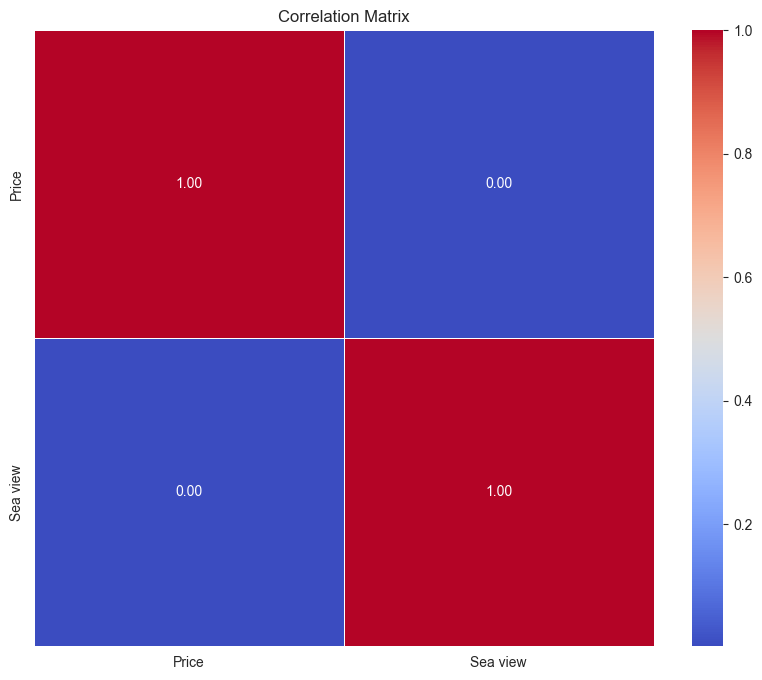

In [40]:
# Correlation between 'Price' and 'Sea View'

correlation_matrix = immo_AP_H_encoded[['Price', 'Sea view']].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 'Price' and 'Sea view' are not correlatet at all

** we will not use it ** 

In [41]:
# Deleting 'Sea view' feature from our Dataset

del immo_AP_H_encoded['Sea view']

immo_AP_H_encoded

,Price,Facades,Habitable Surface,Land Surface,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Surface,Kitchen Type,...,State of Building,Living Surface,EPC,Consumption Per m2,Parking count inside,Parking count outside,Municipality,Province,APARTMENT,HOUSE
0,220000,3.0,115.0,NaN,3.0,1.0,2.0,6.0,10.0,NaN,...,3.0,34.0,4.0,187.0,1.0,1.0,WAREMME,LUIK,1,0
7,339000,3.0,134.0,NaN,3.0,1.0,2.0,6.0,NaN,INSTALLED,...,3.0,30.0,5.0,113.0,NaN,1.0,WETTEREN,OOST-VLAANDEREN,1,0
10,495000,2.0,134.0,NaN,2.0,1.0,2.0,5.0,8.0,INSTALLED,...,3.0,40.0,3.0,202.0,NaN,NaN,ELSENE,BRUSSEL,1,0
11,175000,2.0,90.0,NaN,2.0,1.0,1.0,4.0,9.0,INSTALLED,...,3.0,37.0,5.0,124.0,NaN,1.0,ANTWERPEN,ANTWERPEN,1,0
12,289000,2.0,80.0,NaN,3.0,1.0,1.0,5.0,9.0,INSTALLED,...,3.0,30.0,0.0,383.0,NaN,NaN,JETTE,BRUSSEL,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28353,239000,2.0,109.0,83.0,2.0,2.0,1.0,5.0,NaN,SEMI_EQUIPPED,...,3.0,NaN,3.0,318.0,NaN,NaN,LIER,ANTWERPEN,0,1
28355,225000,NaN,115.0,120.0,4.0,1.0,1.0,6.0,13.0,NaN,...,3.0,28.0,NaN,NaN,NaN,NaN,OUDENAARDE,OOST-VLAANDEREN,0,1
28627,280000,3.0,188.0,0.0,2.0,2.0,2.0,6.0,NaN,NOT_INSTALLED,...,2.0,32.0,1.0,568.0,NaN,NaN,ASSE,VLAAMS-BRABANT,0,1
28631,219000,NaN,84.0,NaN,2.0,1.0,1.0,4.0,NaN,NOT_INSTALLED,...,NaN,NaN,4.0,259.0,1.0,NaN,HASSELT,LIMBURG,1,0


### Kitchen Type feature

In [42]:
# Kitchen Type

immo_AP_H_encoded['Kitchen Type'].unique()

array([nan, 'INSTALLED', 'HYPER_EQUIPPED', 'SEMI_EQUIPPED',
       'USA_HYPER_EQUIPPED', 'USA_INSTALLED', 'USA_SEMI_EQUIPPED',
       'NOT_INSTALLED', 'USA_UNINSTALLED'], dtype=object)

In [43]:
print(f"Total observations: {immo_AP_H_encoded.shape[0]}")
print(f"Total 'Kitchen Type' missing values: {immo_AP_H_encoded['Kitchen Type'].isnull().sum()}")
print(f"Percentage of 'State of Building' missing values: {immo_AP_H_encoded['Kitchen Type'].isnull().mean()}")

Total observations: 8674
Total 'Kitchen Type' missing values: 2039
Percentage of 'State of Building' missing values: 0.23507032510952272


In [44]:
# Encoding Kitchen Type

kitchen_type_encoder = {
    'USA_HYPER_EQUIPPED': 7,
    'HYPER_EQUIPPED': 6,
    'USA_SEMI_EQUIPPED': 5,
    'SEMI_EQUIPPED': 4,
    'USA_INSTALLED': 3,
    'INSTALLED': 2,
    'USA_UNINSTALLED': 1,
    'NOT_INSTALLED': 0    
}

immo_AP_H_encoded['Kitchen Type'] = immo_AP_H_encoded['Kitchen Type'].map(kitchen_type_encoder)

immo_AP_H_encoded

,Price,Facades,Habitable Surface,Land Surface,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Surface,Kitchen Type,...,State of Building,Living Surface,EPC,Consumption Per m2,Parking count inside,Parking count outside,Municipality,Province,APARTMENT,HOUSE
0,220000,3.0,115.0,NaN,3.0,1.0,2.0,6.0,10.0,NaN,...,3.0,34.0,4.0,187.0,1.0,1.0,WAREMME,LUIK,1,0
7,339000,3.0,134.0,NaN,3.0,1.0,2.0,6.0,NaN,2.0,...,3.0,30.0,5.0,113.0,NaN,1.0,WETTEREN,OOST-VLAANDEREN,1,0
10,495000,2.0,134.0,NaN,2.0,1.0,2.0,5.0,8.0,2.0,...,3.0,40.0,3.0,202.0,NaN,NaN,ELSENE,BRUSSEL,1,0
11,175000,2.0,90.0,NaN,2.0,1.0,1.0,4.0,9.0,2.0,...,3.0,37.0,5.0,124.0,NaN,1.0,ANTWERPEN,ANTWERPEN,1,0
12,289000,2.0,80.0,NaN,3.0,1.0,1.0,5.0,9.0,2.0,...,3.0,30.0,0.0,383.0,NaN,NaN,JETTE,BRUSSEL,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28353,239000,2.0,109.0,83.0,2.0,2.0,1.0,5.0,NaN,4.0,...,3.0,NaN,3.0,318.0,NaN,NaN,LIER,ANTWERPEN,0,1
28355,225000,NaN,115.0,120.0,4.0,1.0,1.0,6.0,13.0,NaN,...,3.0,28.0,NaN,NaN,NaN,NaN,OUDENAARDE,OOST-VLAANDEREN,0,1
28627,280000,3.0,188.0,0.0,2.0,2.0,2.0,6.0,NaN,0.0,...,2.0,32.0,1.0,568.0,NaN,NaN,ASSE,VLAAMS-BRABANT,0,1
28631,219000,NaN,84.0,NaN,2.0,1.0,1.0,4.0,NaN,0.0,...,NaN,NaN,4.0,259.0,1.0,NaN,HASSELT,LIMBURG,1,0


# Treating null values

In [45]:
# Retrieving null value count

immo_AP_H_encoded.isnull().sum()

Price                       0
Facades                  2468
Habitable Surface         207
Land Surface             6127
Bedroom Count               0
Bathroom Count           1186
Toilet Count             2162
Room Count                 38
Kitchen Surface          6461
Kitchen Type             2039
Furnished                   0
Fireplace Count          6375
Terrace                     0
Terrace Surface          2650
Garden Surface           7259
State of Building        3595
Living Surface           4882
EPC                      3690
Consumption Per m2       3970
Parking count inside     6059
Parking count outside    5826
Municipality                0
Province                    0
APARTMENT                   0
HOUSE                       0
dtype: int64

In [46]:
immo_AP_H_encoded.isnull().mean()

Price                    0.000000
Facades                  0.284528
Habitable Surface        0.023864
Land Surface             0.706364
Bedroom Count            0.000000
Bathroom Count           0.136730
Toilet Count             0.249251
Room Count               0.004381
Kitchen Surface          0.744870
Kitchen Type             0.235070
Furnished                0.000000
Fireplace Count          0.734955
Terrace                  0.000000
Terrace Surface          0.305511
Garden Surface           0.836869
State of Building        0.414457
Living Surface           0.562831
EPC                      0.425409
Consumption Per m2       0.457690
Parking count inside     0.698524
Parking count outside    0.671662
Municipality             0.000000
Province                 0.000000
APARTMENT                0.000000
HOUSE                    0.000000
dtype: float64

In [47]:
# 'Land Surface', 'Kitchen Surface', 'Fireplace Count', 'Garden Surface', 'Parking count inside' and 'Parking count outside' 
# They have more than 50% of null values.

del immo_AP_H_encoded['Land Surface']
del immo_AP_H_encoded['Kitchen Surface']
del immo_AP_H_encoded['Fireplace Count']
del immo_AP_H_encoded['Garden Surface']
del immo_AP_H_encoded['Parking count inside']
del immo_AP_H_encoded['Parking count outside']


In [48]:
immo_AP_H_encoded.isnull().mean()

Price                 0.000000
Facades               0.284528
Habitable Surface     0.023864
Bedroom Count         0.000000
Bathroom Count        0.136730
Toilet Count          0.249251
Room Count            0.004381
Kitchen Type          0.235070
Furnished             0.000000
Terrace               0.000000
Terrace Surface       0.305511
State of Building     0.414457
Living Surface        0.562831
EPC                   0.425409
Consumption Per m2    0.457690
Municipality          0.000000
Province              0.000000
APARTMENT             0.000000
HOUSE                 0.000000
dtype: float64

### Group properties by municipality and property type, and within each group allow a price difference of up to 50000 euros between properties.
### Calculate the average of the selected features by groups and apply each average to the null values of each group.

In [53]:
# Define the columns for which you want to calculate the average
columns_for_means = ['Habitable Surface', 'Terrace Surface', 'Living Surface', 'Consumption Per m2']
# Define the columns for which you want to calculate the median
columns_for_median = ['Facades', 'Bathroom Count', 'Toilet Count', 'Room Count', 'Kitchen Type', 'State of Building', 'EPC']

# Function for calculating the price difference within each group
def price_difference(group):
    return group.max() - group.min() <= 1000

# Group by Municipality and type of property ('APARTMENT' or 'HOUSE'), and apply the price difference function
price_group = immo_AP_H_encoded.groupby(['Province', 'APARTMENT', 'HOUSE'])['Price'].apply(price_difference)

# Filter the groups that satisfy the price difference criteria
filtered_groups = price_group[price_group]

# Calculate the mean of each group for the specified columns
means_per_group = immo_AP_H_encoded.groupby(['Province', 'APARTMENT', 'HOUSE'])[columns_for_means].mean()
# Calculate the median of each group for the specified columns
medians_per_group = immo_AP_H_encoded.groupby(['Province', 'APARTMENT', 'HOUSE'])[columns_for_median].median()

print(means_per_group)
print(medians_per_group)

# Fill in the null values in each group with the calculated means.
immo_AP_H_imputed = immo_AP_H_encoded.copy()  

for group, mean in means_per_group.iterrows():
    group_mask = (immo_AP_H_imputed['Province'] == group[0]) & (immo_AP_H_imputed['APARTMENT'] == group[1]) & (immo_AP_H_imputed['HOUSE'] == group[2])
    immo_AP_H_imputed.loc[group_mask, columns_for_means] = immo_AP_H_imputed.loc[group_mask, columns_for_means].fillna(mean)
    
for group, median in medians_per_group.iterrows():
    group_mask = (immo_AP_H_imputed['Province'] == group[0]) & (immo_AP_H_imputed['APARTMENT'] == group[1]) & (immo_AP_H_imputed['HOUSE'] == group[2])
    immo_AP_H_imputed.loc[group_mask, columns_for_median] = immo_AP_H_imputed.loc[group_mask, columns_for_median].fillna(median)


                                 Habitable Surface  Terrace Surface  \
Province        APARTMENT HOUSE                                       
ANTWERPEN       0         1             206.827051        20.904494   
                1         0             113.089186        18.383954   
BRUSSEL         0         1             262.087838        27.307692   
                1         0             100.870327        18.138306   
HENEGOUWEN      0         1             197.901639        37.981481   
                1         0              88.246057        13.059072   
LIMBURG         0         1             221.368421        25.500000   
                1         0              98.549550        13.460674   
LUIK            0         1             179.329710        33.081967   
                1         0              93.740984        16.338235   
LUXEMBURG       0         1             209.945055        29.771429   
                1         0              89.546729        12.683060   
NAMEN 

In [54]:
immo_AP_H_imputed

,Price,Facades,Habitable Surface,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Type,Furnished,Terrace,Terrace Surface,State of Building,Living Surface,EPC,Consumption Per m2,Municipality,Province,APARTMENT,HOUSE
0,220000,3.0,115.000000,3.0,1.0,2.0,6.0,2.0,0,1,16.338235,3.0,34.000000,4.0,187.000000,WAREMME,LUIK,1,0
7,339000,3.0,134.000000,3.0,1.0,2.0,6.0,2.0,0,1,18.640212,3.0,30.000000,5.0,113.000000,WETTEREN,OOST-VLAANDEREN,1,0
10,495000,2.0,134.000000,2.0,1.0,2.0,5.0,2.0,0,1,12.000000,3.0,40.000000,3.0,202.000000,ELSENE,BRUSSEL,1,0
11,175000,2.0,90.000000,2.0,1.0,1.0,4.0,2.0,0,1,7.000000,3.0,37.000000,5.0,124.000000,ANTWERPEN,ANTWERPEN,1,0
12,289000,2.0,80.000000,3.0,1.0,1.0,5.0,2.0,0,1,2.000000,3.0,30.000000,0.0,383.000000,JETTE,BRUSSEL,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28353,239000,2.0,109.000000,2.0,2.0,1.0,5.0,4.0,0,1,8.000000,3.0,36.045161,3.0,318.000000,LIER,ANTWERPEN,0,1
28355,225000,3.0,115.000000,4.0,1.0,1.0,6.0,4.0,0,1,22.514894,3.0,28.000000,4.0,315.874618,OUDENAARDE,OOST-VLAANDEREN,0,1
28627,280000,3.0,188.000000,2.0,2.0,2.0,6.0,0.0,0,1,15.000000,2.0,32.000000,1.0,568.000000,ASSE,VLAAMS-BRABANT,0,1
28631,219000,2.0,84.000000,2.0,1.0,1.0,4.0,0.0,0,1,13.460674,3.0,38.250000,4.0,259.000000,HASSELT,LIMBURG,1,0


In [55]:
immo_AP_H_imputed.isnull().mean()

Price                 0.0
Facades               0.0
Habitable Surface     0.0
Bedroom Count         0.0
Bathroom Count        0.0
Toilet Count          0.0
Room Count            0.0
Kitchen Type          0.0
Furnished             0.0
Terrace               0.0
Terrace Surface       0.0
State of Building     0.0
Living Surface        0.0
EPC                   0.0
Consumption Per m2    0.0
Municipality          0.0
Province              0.0
APARTMENT             0.0
HOUSE                 0.0
dtype: float64

In [56]:
immo_AP_H_imputed.describe()

,Price,Facades,Habitable Surface,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Type,Furnished,Terrace,Terrace Surface,State of Building,Living Surface,EPC,Consumption Per m2,APARTMENT,HOUSE
count,8.674000e+03,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000
mean,4.218532e+05,2.682845,130.511265,2.418031,1.265967,1.488125,4.743717,3.988702,0.019599,0.805626,20.760467,4.013143,36.526347,4.730747,195.816689,0.706364,0.293636
std,3.063328e+05,0.815649,116.910745,1.297641,0.672928,0.786670,2.546948,2.253989,0.138625,0.395741,22.943013,1.178250,45.030448,1.510729,505.745145,0.455453,0.455453
min,3.000000e+04,1.000000,12.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,-18.000000,0.000000,0.000000
25%,2.699000e+05,2.000000,88.000000,2.000000,1.000000,1.000000,3.000000,2.000000,0.000000,1.000000,10.000000,3.000000,32.000000,4.000000,85.221716,0.000000,0.000000
50%,3.500000e+05,2.000000,108.000000,2.000000,1.000000,1.000000,4.000000,4.000000,0.000000,1.000000,18.138306,5.000000,35.421875,5.000000,147.473879,1.000000,0.000000
75%,4.650000e+05,3.000000,153.000000,3.000000,1.000000,2.000000,6.000000,6.000000,0.000000,1.000000,23.000000,5.000000,38.655914,6.000000,247.000000,1.000000,1.000000
max,7.650000e+06,7.000000,7819.000000,25.000000,20.000000,21.000000,61.000000,7.000000,1.000000,1.000000,973.000000,5.000000,4146.000000,8.000000,43792.000000,1.000000,1.000000


In [57]:
immo_AP_H_imputed[immo_AP_H_imputed['Room Count'] == 61]

,Price,Facades,Habitable Surface,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Type,Furnished,Terrace,Terrace Surface,State of Building,Living Surface,EPC,Consumption Per m2,Municipality,Province,APARTMENT,HOUSE
4720,3200000,3.0,1820.0,20.0,20.0,21.0,61.0,6.0,0,0,20.904494,3.0,36.045161,4.0,370.916783,MECHELEN,ANTWERPEN,0,1


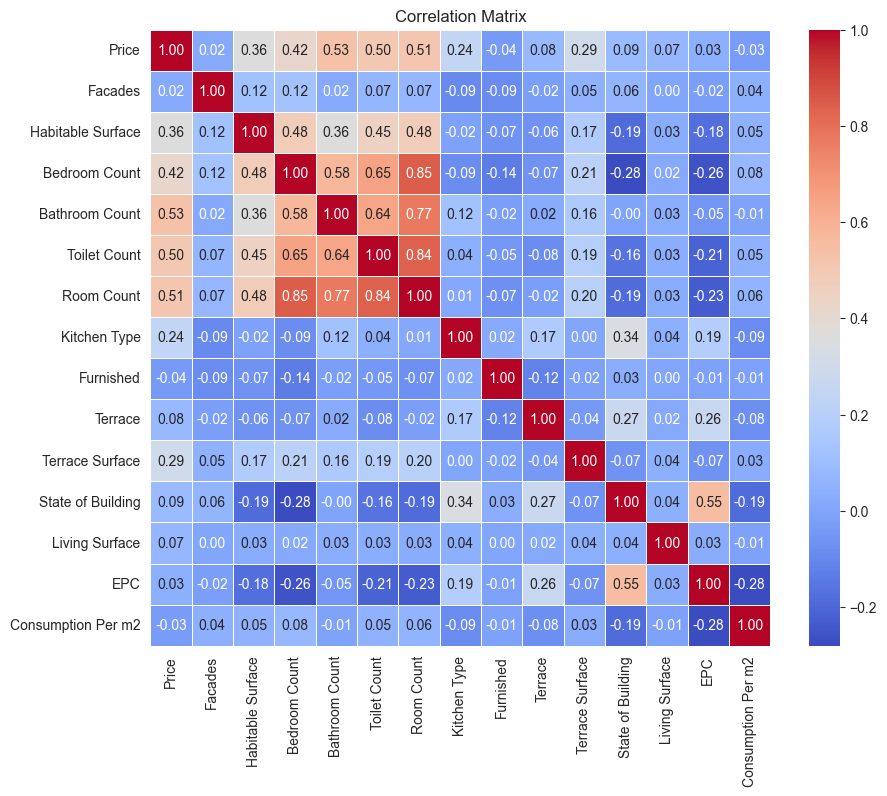

In [66]:
# correlation_matrix = immo_AP_H[immo_AP_H.select_dtypes(include=['int', 'float']).columns].corr()
correlation_matrix = immo_AP_H_imputed[immo_AP_H_imputed.columns[:-4].tolist()].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Treating outliers values

In [82]:

# for column in immo_AP_H_imputed.columns[:-4]:
#     plt.figure(figsize=(8, 6))
#     plt.boxplot(immo_AP_H_imputed[column])
#     plt.title(column)
#     plt.ylabel(column) 
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

IndexError: index 15 is out of bounds for axis 0 with size 15

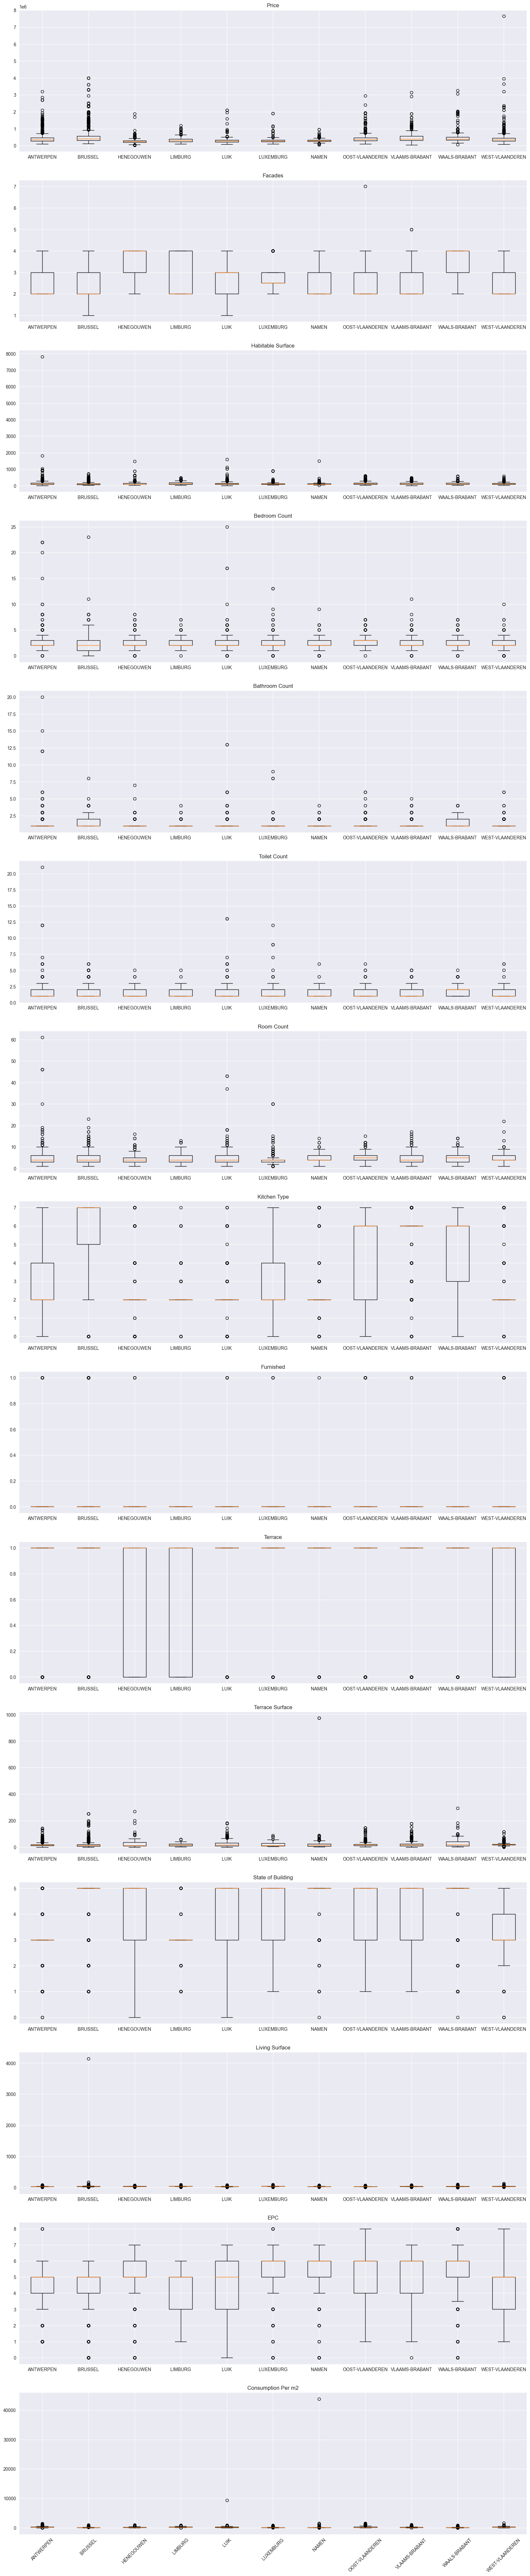

In [87]:

province_groups = immo_AP_H_imputed.groupby('Province')


fig, axs = plt.subplots(len(immo_AP_H_imputed.columns[:-4]), figsize=(20, 100))


for i, (col) in enumerate(immo_AP_H_imputed.columns):
    province_data = [group[1][col].dropna() for group in province_groups]
    
    plt.xticks(rotation=45)
    axs[i].boxplot(province_data)
    axs[i].set_title(col)
    axs[i].set_xticklabels(province_groups.groups.keys())

plt.tight_layout()

plt.show()

In [93]:
# Looking for values < 0

immo_AP_H_imputed[immo_AP_H_imputed.loc[:,'Price':'Consumption Per m2'] < 0].count()

Price                 0
Facades               0
Habitable Surface     0
Bedroom Count         0
Bathroom Count        0
Toilet Count          0
Room Count            0
Kitchen Type          0
Furnished             0
Terrace               0
Terrace Surface       0
State of Building     0
Living Surface        0
EPC                   0
Consumption Per m2    5
Municipality          0
Province              0
APARTMENT             0
HOUSE                 0
dtype: int64

In [94]:
# In the 'Consumption Per m2' are 5 values < 0

# Converting these values to positive

immo_AP_H_imputed['Consumption Per m2'] = immo_AP_H_imputed['Consumption Per m2'].abs()

In [95]:
immo_AP_H_imputed[immo_AP_H_imputed.loc[:,'Price':'Consumption Per m2'] < 0].count()

Price                 0
Facades               0
Habitable Surface     0
Bedroom Count         0
Bathroom Count        0
Toilet Count          0
Room Count            0
Kitchen Type          0
Furnished             0
Terrace               0
Terrace Surface       0
State of Building     0
Living Surface        0
EPC                   0
Consumption Per m2    0
Municipality          0
Province              0
APARTMENT             0
HOUSE                 0
dtype: int64